In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Load the updated data from the new CSV file
file_path = '../data/Water Level - Santa Barbara - v2.csv'
updated_data = pd.read_csv(file_path)

# Display the first few rows of the updated dataset to understand its structure
updated_data.head(), updated_data.dtypes


(       Date Time (GMT)  Predicted (ft)  Verified (ft)
 0  1/1/2023       0:00           2.623           3.14
 1  1/1/2023       1:00           2.964           3.45
 2  1/1/2023       2:00           3.021           3.74
 3  1/1/2023       3:00           2.822           3.44
 4  1/1/2023       4:00           2.450           3.08,
 Date               object
 Time (GMT)         object
 Predicted (ft)    float64
 Verified (ft)     float64
 dtype: object)

In [2]:
# Convert 'Date' and 'Time (GMT)' into a single datetime column and set it as index
updated_data['Datetime'] = pd.to_datetime(updated_data['Date'] + ' ' + updated_data['Time (GMT)'])
updated_data.set_index('Datetime', inplace=True)

# Extracting additional features
updated_data['Hour'] = updated_data.index.hour
updated_data['Day'] = updated_data.index.day
updated_data['Month'] = updated_data.index.month
updated_data['Year'] = updated_data.index.year

# Drop the original 'Date' and 'Time (GMT)' columns as they are no longer necessary
updated_data.drop(['Date', 'Time (GMT)'], axis=1, inplace=True)

# Display the updated DataFrame with new features
updated_data.head()

,Predicted (ft),Verified (ft),Hour,Day,Month,Year
Datetime,,,,,,
2023-01-01 00:00:00,2.623,3.14,0,1,1,2023
2023-01-01 01:00:00,2.964,3.45,1,1,1,2023
2023-01-01 02:00:00,3.021,3.74,2,1,1,2023
2023-01-01 03:00:00,2.822,3.44,3,1,1,2023
2023-01-01 04:00:00,2.450,3.08,4,1,1,2023


In [3]:
data = updated_data

In [5]:
data.head()

,Predicted (ft),Verified (ft),Hour,Day,Month,Year
Datetime,,,,,,
2023-01-01 00:00:00,2.623,3.14,0,1,1,2023
2023-01-01 01:00:00,2.964,3.45,1,1,1,2023
2023-01-01 02:00:00,3.021,3.74,2,1,1,2023
2023-01-01 03:00:00,2.822,3.44,3,1,1,2023
2023-01-01 04:00:00,2.450,3.08,4,1,1,2023


In [4]:
features = data[['Predicted (ft)', 'Hour', 'Day', 'Month', 'Year']].values
target = data['Verified (ft)'].values

scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()

features_scaled = scaler_features.fit_transform(features)
target_scaled = scaler_target.fit_transform(target.reshape(-1, 1))

sequence_length = 24
generator = TimeseriesGenerator(features_scaled, target_scaled, length=sequence_length, batch_size=1)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(50, input_shape=(sequence_length, features.shape[1])),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(generator, epochs=20)


Epoch 1/20
10920/10920 [==============================] - 43s 4ms/step - loss: 0.0024
Epoch 2/20
10920/10920 [==============================] - 37s 3ms/step - loss: 6.6238e-04
Epoch 3/20
10920/10920 [==============================] - 37s 3ms/step - loss: 5.8170e-04
Epoch 4/20
10920/10920 [==============================] - 41s 4ms/step - loss: 5.3561e-04
Epoch 5/20
10920/10920 [==============================] - 40s 4ms/step - loss: 5.1254e-04
Epoch 6/20
10920/10920 [==============================] - 37s 3ms/step - loss: 4.9039e-04
Epoch 7/20
10920/10920 [==============================] - 44s 4ms/step - loss: 4.7170e-04
Epoch 8/20
10920/10920 [==============================] - 43s 4ms/step - loss: 4.5725e-04
Epoch 9/20
10920/10920 [==============================] - 41s 4ms/step - loss: 4.4816e-04
Epoch 10/20
10920/10920 [==============================] - 41s 4ms/step - loss: 4.3526e-04
Epoch 11/20
10920/10920 [==============================] - 40s 4ms/step - loss: 4.2538e-04
Epoch 12/20


In [17]:
# Load the future data from the uploaded CSV file
future_data_path = '../data/future data - Santa Barbara.csv'
# future_data_path = '../data/Water Level - Santa Barbara - v2.csv'
future_data = pd.read_csv(future_data_path)

# Display the first few rows of the future dataset to understand its structure
future_data.head(), future_data.dtypes


(       Date Time (GMT)  Predicted (ft)  Verified (ft)
 0  1/1/2023       0:00           2.623           3.14
 1  1/1/2023       1:00           2.964           3.45
 2  1/1/2023       2:00           3.021           3.74
 3  1/1/2023       3:00           2.822           3.44
 4  1/1/2023       4:00           2.450           3.08,
 Date               object
 Time (GMT)         object
 Predicted (ft)    float64
 Verified (ft)     float64
 dtype: object)

In [18]:
# Convert 'Date' and 'Time (GMT)' into a single datetime column and set it as index
future_data['Datetime'] = pd.to_datetime(future_data['Date'] + ' ' + future_data['Time (GMT)'])
future_data.set_index('Datetime', inplace=True)

# Extracting additional features
future_data['Hour'] = future_data.index.hour
future_data['Day'] = future_data.index.day
future_data['Month'] = future_data.index.month
future_data['Year'] = future_data.index.year

# Drop the original 'Date' and 'Time (GMT)' columns as they are no longer necessary
future_data.drop(['Date', 'Time (GMT)'], axis=1, inplace=True)

# Display the updated DataFrame with new features
future_data.head()


,Predicted (ft),Verified (ft),Hour,Day,Month,Year
Datetime,,,,,,
2023-01-01 00:00:00,2.623,3.14,0,1,1,2023
2023-01-01 01:00:00,2.964,3.45,1,1,1,2023
2023-01-01 02:00:00,3.021,3.74,2,1,1,2023
2023-01-01 03:00:00,2.822,3.44,3,1,1,2023
2023-01-01 04:00:00,2.450,3.08,4,1,1,2023


In [19]:
# Prepare the features you trained on, excluding 'Verified (ft)' if it was not used as an input
features_to_scale = future_data[['Predicted (ft)', 'Hour', 'Day', 'Month', 'Year']]

# Transform the features using the scaler (use .values to avoid issues with feature names)
future_scaled = scaler_features.transform(features_to_scale.values)

# Check if there are at least 24 hours of data to make a prediction
if len(future_scaled) >= 24:
    # Prepare the last 24-hour sequence for prediction
    last_sequence = future_scaled[-24:].reshape(1, 24, -1)  # Reshape for LSTM input: (samples, time steps, features)

    # Use your existing model to make predictions
    predictions_scaled = model.predict(last_sequence)

    # Inverse transform the scaled prediction back to original scale
    predictions = scaler_target.inverse_transform(predictions_scaled)

    # Print or use the predictions
    print("Predicted Verified Water Levels for the Next Hour:", predictions)
else:
    print("Not enough data to make a prediction. At least 24 hours of data is required.")


Predicted Verified Water Levels for the Next Hour: [[2.8717585]]


In [20]:
# Start with the last known 24-hour sequence
if len(future_scaled) >= 24:
    current_sequence = future_scaled[-24:].reshape(1, 24, future_scaled.shape[1])  # Ensure correct number of features

    predictions = []

    for _ in range(24):
        # Predict the next hour's water level
        current_prediction_scaled = model.predict(current_sequence)
        current_prediction = scaler_target.inverse_transform(current_prediction_scaled)
        predictions.append(current_prediction[0][0])  # Store the prediction

        # Update the sequence for the next prediction
        # Create a new entry where the prediction updates the first feature
        new_entry = current_sequence[:, -1, :].reshape(1, 1, -1)  # Take the last time step as the base
        new_entry[0, 0, 0] = current_prediction_scaled[0][0]  # Update only the predicted feature

        # Append the new entry to the sequence and remove the oldest entry
        current_sequence = np.append(current_sequence[:, 1:, :], new_entry, axis=1)

    print("Predicted Verified Water Levels for the Next 24 Hours:", predictions)
else:
    print("Not enough data to make a prediction. At least 24 hours of data is required.")


Predicted Verified Water Levels for the Next 24 Hours: [2.8717585, 2.5875745, 2.9694939, 2.7236438, 3.0305967, 2.8472257, 3.121901, 2.888358, 3.2354333, 2.8236377, 3.3849761, 2.5945299, 3.5831196, 2.1611333, 3.6918724, 1.7409874, 3.648677, 1.5307202, 3.7044363, 1.5180522, 3.8162925, 1.6285065, 4.002416, 1.7766211]


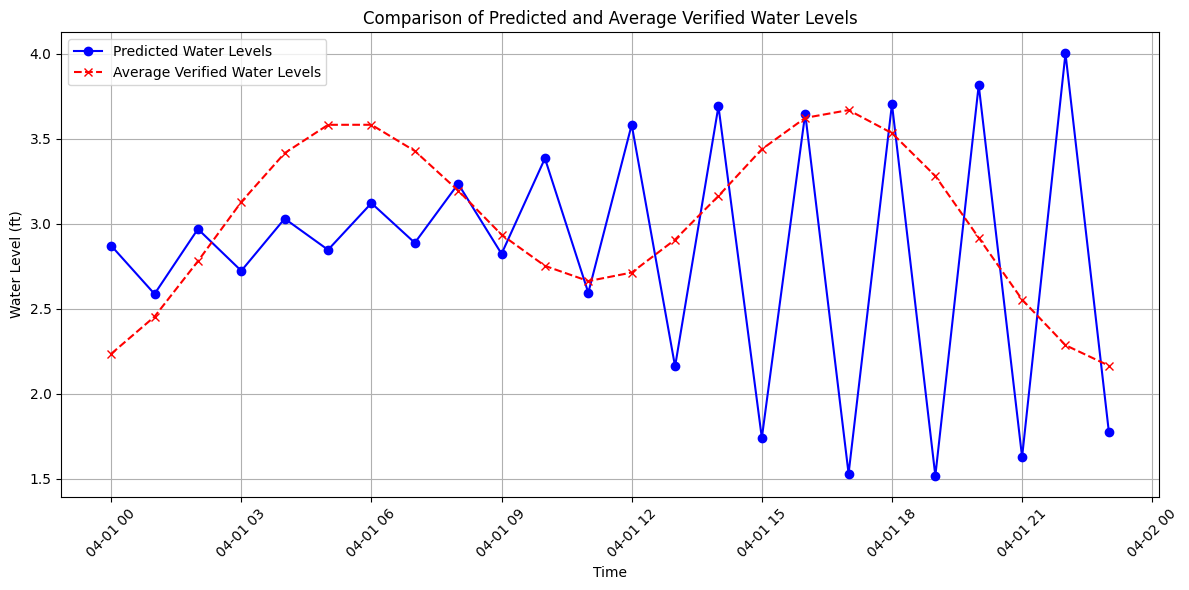

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Calculate hourly averages from the 'Verified (ft)' column in your existing future_data
hourly_averages = future_data.groupby(future_data.index.hour)['Verified (ft)'].mean()

# Generate hourly timestamps for the next 24 hours starting from the last known data point
last_time_point = future_data.index[-1]  # Adjust if necessary to align with your future_data's last timestamp
prediction_times = pd.date_range(start=last_time_point, periods=25, freq='H')[1:]  # Next 24 hours

# Prepare the hourly averages to align with prediction times
average_verified_levels = [hourly_averages[hour] for hour in prediction_times.hour]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(prediction_times, predictions, label='Predicted Water Levels', marker='o', linestyle='-', color='b')
plt.plot(prediction_times, average_verified_levels, label='Average Verified Water Levels', marker='x', linestyle='--', color='r')
plt.title('Comparison of Predicted and Average Verified Water Levels')
plt.xlabel('Time')
plt.ylabel('Water Level (ft)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()


In [24]:
hourly_averages = data.groupby(data.index.hour)['Verified (ft)'].mean()

In [27]:
# Define the start date and number of days for which you need future data
start_date = '2024-04-01 00:00:00'
num_days = 1  # Example for one day; adjust as needed for more days

# Generate future date range
future_dates = pd.date_range(start=start_date, periods=24 * num_days, freq='H')

# Create the future data DataFrame
future_data = pd.DataFrame(index=future_dates)

# Populate future data with hourly averages
future_data['Hour'] = future_data.index.hour
future_data['Predicted (ft)'] = [hourly_averages[hour] for hour in future_data['Hour']]

# Optionally, add additional features like day, month, year if used in the model
future_data['Day'] = future_data.index.day
future_data['Month'] = future_data.index.month
future_data['Year'] = future_data.index.year

# Display the first few rows to verify
future_data

,Hour,Predicted (ft),Day,Month,Year
2024-04-01 00:00:00,0,2.235439,1,4,2024
2024-04-01 01:00:00,1,2.454145,1,4,2024
2024-04-01 02:00:00,2,2.780285,1,4,2024
2024-04-01 03:00:00,3,3.128860,1,4,2024
2024-04-01 04:00:00,4,3.416118,1,4,2024
2024-04-01 05:00:00,5,3.582632,1,4,2024
2024-04-01 06:00:00,6,3.582895,1,4,2024
2024-04-01 07:00:00,7,3.428750,1,4,2024
2024-04-01 08:00:00,8,3.195877,1,4,2024
2024-04-01 09:00:00,9,2.936316,1,4,2024


In [29]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import numpy as np

# Prepare the features you trained on, excluding 'Verified (ft)' if it was not used as an input
features_to_scale = future_data[['Predicted (ft)', 'Hour', 'Day', 'Month', 'Year']]

# Transform the features using the scaler (use .values to avoid issues with feature names)
future_scaled = scaler_features.transform(features_to_scale.values)

# Check if there are at least 24 hours of data to make a prediction
if len(future_scaled) >= 24:
    # Prepare the last 24-hour sequence for prediction
    last_sequence = future_scaled[-24:].reshape(1, 24, -1)  # Reshape for LSTM input: (samples, time steps, features)

    # Use your existing model to make predictions
    predictions_scaled = model.predict(last_sequence)

    # Inverse transform the scaled prediction back to original scale
    predictions = scaler_target.inverse_transform(predictions_scaled)

    # Print or use the predictions
    print("Predicted Verified Water Levels for the Next Hour:", predictions)
else:
    print("Not enough data to make a prediction. At least 24 hours of data is required.")


Predicted Verified Water Levels for the Next Hour: [[2.4486268]]


In [30]:
# Start with the last known 24-hour sequence
if len(future_scaled) >= 24:
    current_sequence = future_scaled[-24:].reshape(1, 24, future_scaled.shape[1])  # Ensure correct number of features

    predictions = []

    for _ in range(24):
        # Predict the next hour's water level
        current_prediction_scaled = model.predict(current_sequence)
        current_prediction = scaler_target.inverse_transform(current_prediction_scaled)
        predictions.append(current_prediction[0][0])  # Store the prediction

        # Update the sequence for the next prediction
        # Create a new entry where the prediction updates the first feature
        new_entry = current_sequence[:, -1, :].reshape(1, 1, -1)  # Take the last time step as the base
        new_entry[0, 0, 0] = current_prediction_scaled[0][0]  # Update only the predicted feature

        # Append the new entry to the sequence and remove the oldest entry
        current_sequence = np.append(current_sequence[:, 1:, :], new_entry, axis=1)

    print("Predicted Verified Water Levels for the Next 24 Hours:", predictions)
else:
    print("Not enough data to make a prediction. At least 24 hours of data is required.")

Predicted Verified Water Levels for the Next 24 Hours: [2.4486268, 2.5682929, 2.567664, 2.614149, 2.6446292, 2.685153, 2.7149572, 2.7477508, 2.777823, 2.806859, 2.8345113, 2.8608303, 2.8863444, 2.9099176, 2.9314003, 2.9517937, 2.969088, 2.985639, 2.9999373, 3.0128, 3.024269, 3.0339658, 3.0431337, 3.0501175]


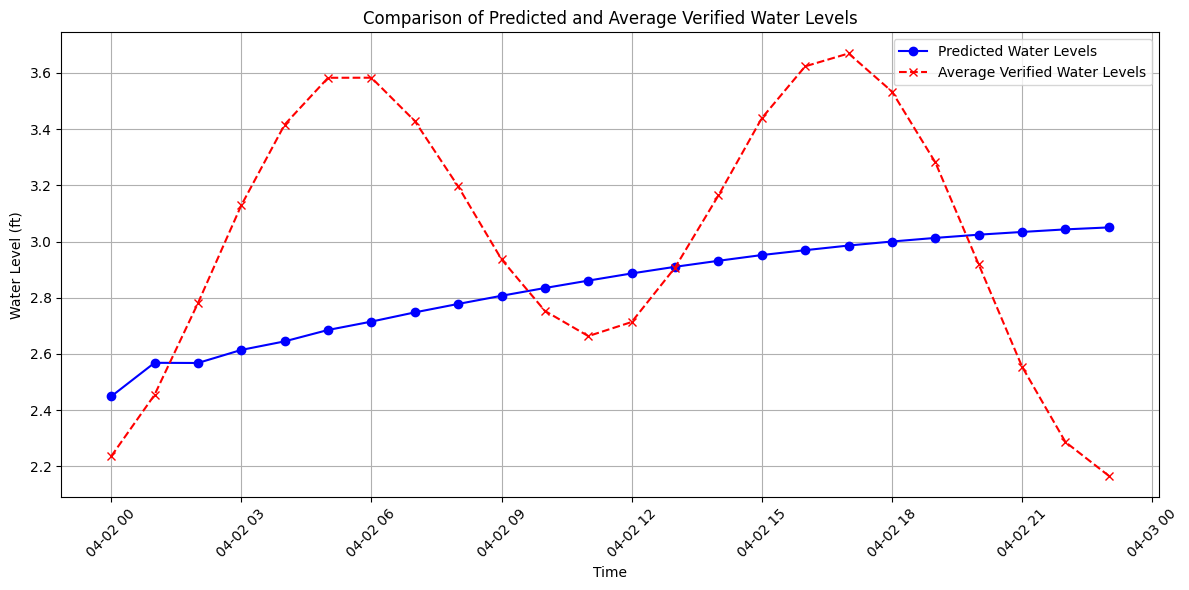

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Generate hourly timestamps for the next 24 hours starting from the last known data point
last_time_point = future_data.index[-1]  # Adjust if necessary to align with your future_data's last timestamp
prediction_times = pd.date_range(start=last_time_point, periods=25, freq='H')[1:]  # Next 24 hours

# Prepare the hourly averages to align with prediction times
average_verified_levels = [hourly_averages[hour] for hour in prediction_times.hour]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(prediction_times, predictions, label='Predicted Water Levels', marker='o', linestyle='-', color='b')
plt.plot(prediction_times, average_verified_levels, label='Average Verified Water Levels', marker='x', linestyle='--', color='r')
plt.title('Comparison of Predicted and Average Verified Water Levels')
plt.xlabel('Time')
plt.ylabel('Water Level (ft)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()